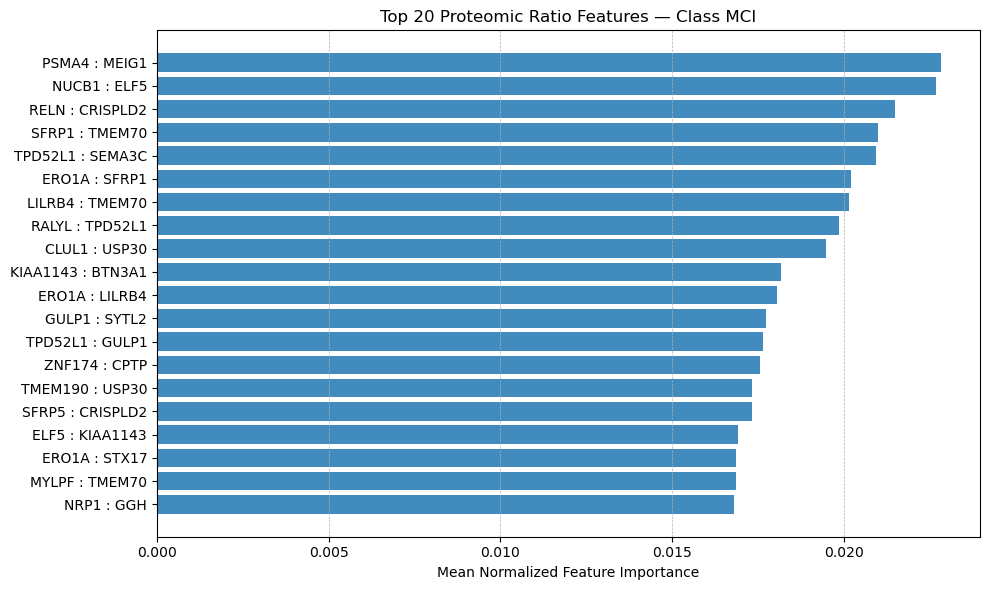

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/proteomic_only_top20_ratios_MCI.pdf


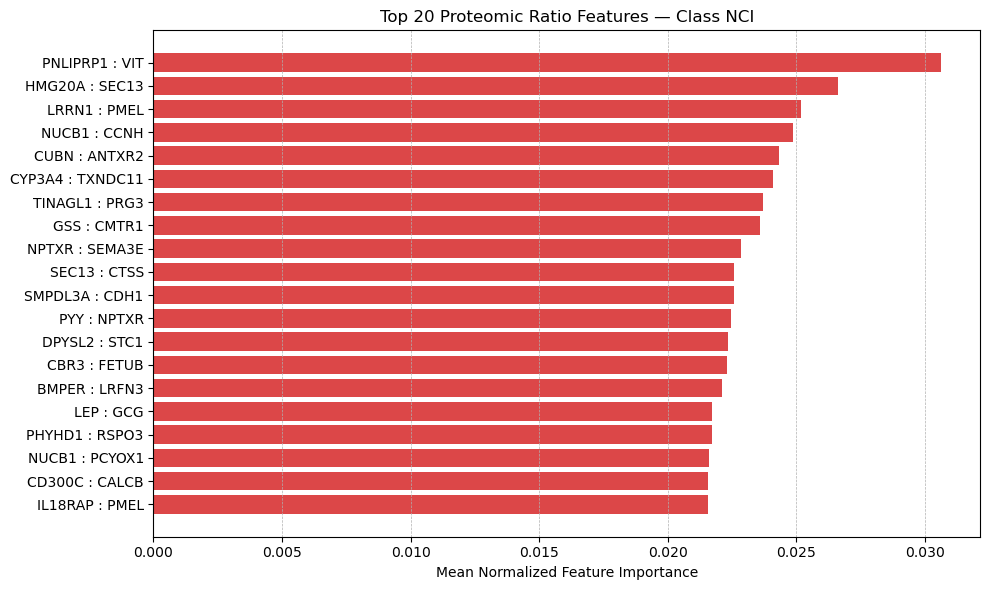

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/proteomic_only_top20_ratios_NCI.pdf


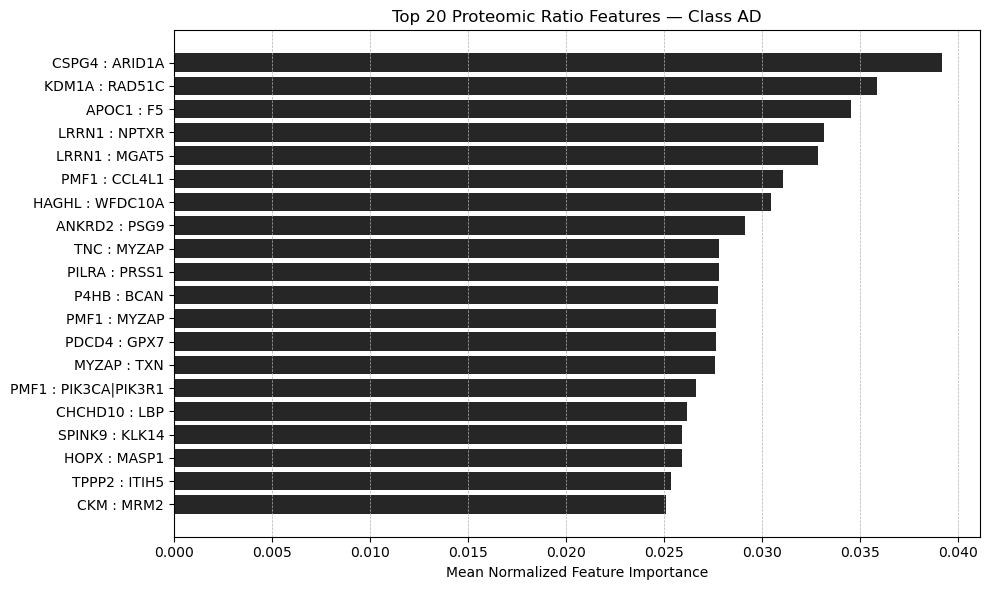

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/proteomic_only_top20_ratios_AD.pdf


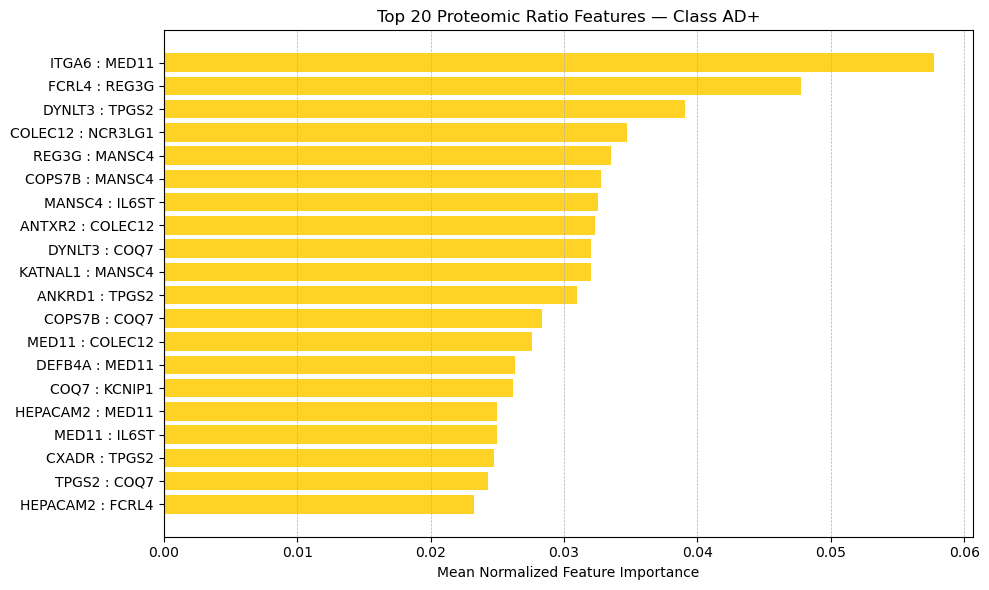

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/proteomic_only_top20_ratios_ADplus.pdf


In [20]:
# =========================
# FEATURE IMPORTANCE PLOTS (PROTEIN RATIOS) — STANDALONE
# =========================
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
out_dir = "/Users/adithyamadduri/Desktop/Projects/proteomics_LGBM(ANML+Meta)_RATIOS_fixed_rfe"
protein_metadata_path = "/Users/adithyamadduri/Downloads/syn65414912/OhNM2025_ROSMAP_plasma_Soma7k_protein_metadata.csv"

classes = ["MCI", "NCI", "AD", "AD+"]
seeds = [1, 2, 3, 4, 5]
top_n = 20  # number of top features to display

os.makedirs(out_dir, exist_ok=True)

# ---- Color scheme ----
CLASS_COLOR = {
    "MCI": "#1f77b4",   # blue
    "NCI": "#d62728",   # red
    "AD":  "#000000",   # black
    "AD+": "#ffcc00",   # yellow
}

# ---- Load SeqId → GeneSymbol mapping ----
df_meta = pd.read_csv(protein_metadata_path)
seqid_to_gene = dict(zip(df_meta["SeqId"], df_meta["EntrezGeneSymbol"]))

def safe_cls(c):
    return c.replace("+", "plus").replace(" ", "_").replace("/", "-")

# ---- Helper: map ratio feature name to gene symbols ----
def map_ratio_name(name):
    if "_div_" in name:
        left, right = name.split("_div_")
        gene_left = seqid_to_gene.get(left, left)
        gene_right = seqid_to_gene.get(right, right)
        return f"{gene_left} : {gene_right}"
    return seqid_to_gene.get(name, name)

# ---- Helper: robustly extract importances & feature names ----
def get_feat_importances(automl):
    try:
        model = automl.model.estimator
    except AttributeError:
        model = getattr(automl, "model", automl)
    importances = getattr(model, "feature_importances_")
    features = getattr(automl, "feature_names_in_", None)
    if features is None:
        features = getattr(model, "feature_names_in_", None)
    if features is None:
        raise AttributeError("Could not find feature_names_in_ on automl/model.")
    return np.asarray(importances, dtype=float), np.asarray(features, dtype=str)

# === MAIN LOOP ===
for cls in classes:
    out_dir = "/Users/adithyamadduri/Desktop/Projects/proteomics_LGBM(ANML+Meta)_RATIOS_fixed_rfe"
    
    feature_importance_list = []

    for seed in seeds:
        pkl_path = os.path.join(out_dir, f"seed{seed}_{safe_cls(cls)}_automl.pkl")
        if not os.path.exists(pkl_path):
            print(f"Missing: {pkl_path}")
            continue

        with open(pkl_path, "rb") as f:
            automl = pickle.load(f)

        importances, features = get_feat_importances(automl)

        # Normalize importance
        s = importances.sum()
        norm_importance = importances if s == 0 else importances / s
        feature_importance_list.append(pd.Series(norm_importance, index=features))

    if not feature_importance_list:
        print(f"No data for class: {cls}")
        continue

    # Combine across seeds
    df_importances = pd.concat(feature_importance_list, axis=1)
    df_importances.columns = [f"seed{i+1}" for i in range(len(df_importances.columns))]

    # Compute mean across seeds
    df_importances["mean"] = df_importances.mean(axis=1)

    # Take top N
    df_top = df_importances.sort_values("mean", ascending=False).head(top_n).copy()

    # Map feature names
    df_top["mapped_name"] = df_top.index.map(map_ratio_name)

    # === Plot ===
    plt.figure(figsize=(10, max(6, 0.3 * top_n)))
    plt.barh(
        y=df_top["mapped_name"][::-1],
        width=df_top["mean"][::-1],
        color=CLASS_COLOR[cls],   # class-specific color
        alpha=0.85
    )

    plt.xlabel("Mean Normalized Feature Importance")
    plt.title(f"Top {top_n} Proteomic Ratio Features — Class {cls}")
    plt.tight_layout()
    plt.grid(True, axis="x", linestyle="--", linewidth=0.5)


    out_dir = "/Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures"

    # Save plot
    plot_path = os.path.join(out_dir, f"proteomic_only_top{top_n}_ratios_{safe_cls(cls)}.pdf")
    plt.savefig(plot_path, dpi=300)
    plt.show()

    print(f"Saved: {plot_path}")

/var/folders/yr/4bplyc1x1tq4xz4jckbg_8wr0000gn/T/ipykernel_25805/2494994787.py:72: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  automl = pickle.load(f)
/var/folders/yr/4bplyc1x1tq4xz4jckbg_8wr0000gn/T/ipykernel_25805/2494994787.py:72: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usag

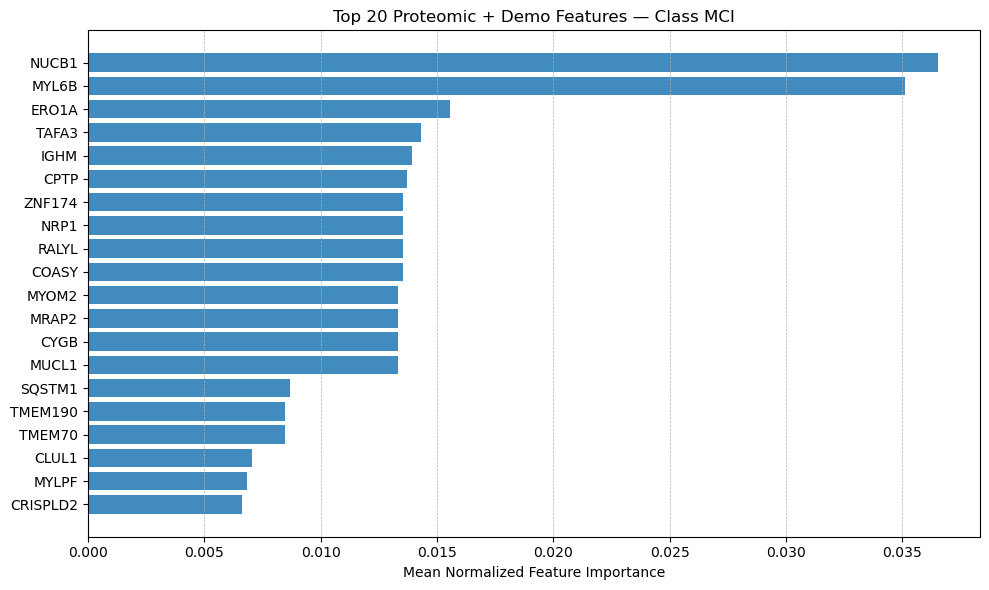

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/proteomics_demo_top20_MCI.pdf


/var/folders/yr/4bplyc1x1tq4xz4jckbg_8wr0000gn/T/ipykernel_25805/2494994787.py:72: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  automl = pickle.load(f)
/var/folders/yr/4bplyc1x1tq4xz4jckbg_8wr0000gn/T/ipykernel_25805/2494994787.py:72: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usag

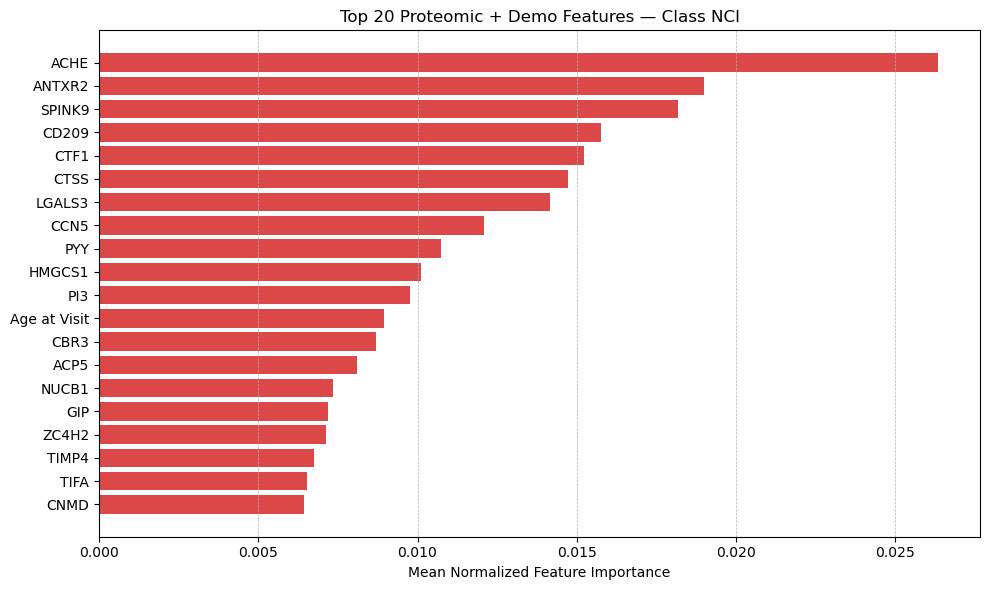

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/proteomics_demo_top20_NCI.pdf


/var/folders/yr/4bplyc1x1tq4xz4jckbg_8wr0000gn/T/ipykernel_25805/2494994787.py:72: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  automl = pickle.load(f)
/var/folders/yr/4bplyc1x1tq4xz4jckbg_8wr0000gn/T/ipykernel_25805/2494994787.py:72: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usag

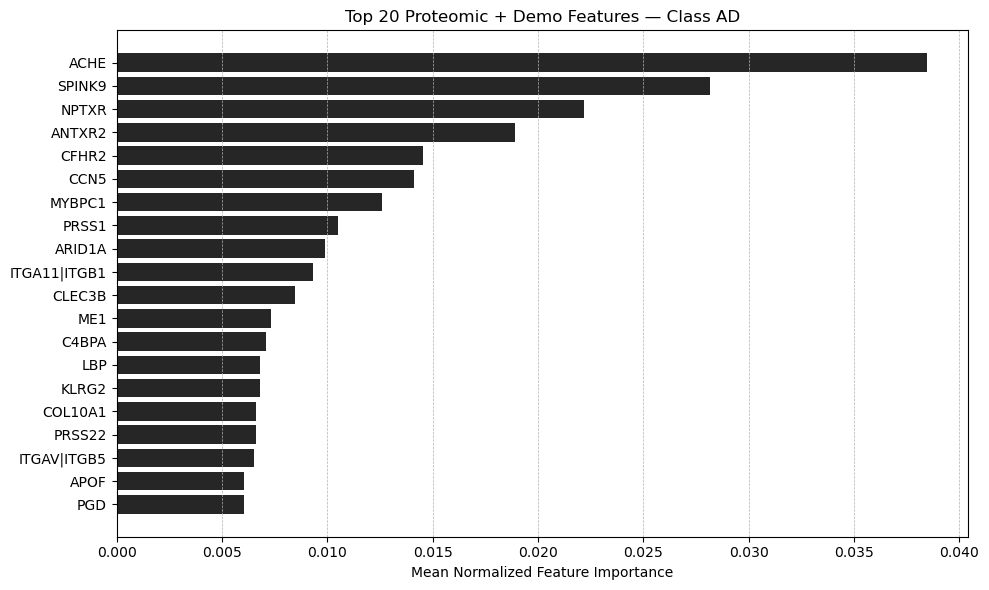

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/proteomics_demo_top20_AD.pdf


/var/folders/yr/4bplyc1x1tq4xz4jckbg_8wr0000gn/T/ipykernel_25805/2494994787.py:72: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  automl = pickle.load(f)
/var/folders/yr/4bplyc1x1tq4xz4jckbg_8wr0000gn/T/ipykernel_25805/2494994787.py:72: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usag

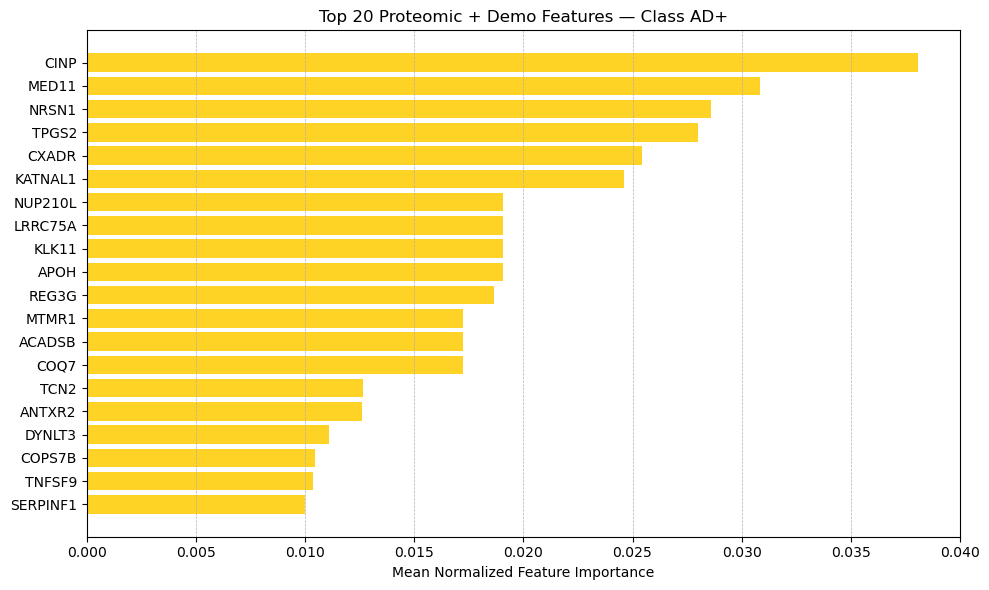

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/proteomics_demo_top20_ADplus.pdf


In [21]:
# =========================
# FEATURE IMPORTANCE PLOTS (PROTEIN RATIOS) — STANDALONE
# =========================
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
out_dir = "/Users/adithyamadduri/Desktop/Projects/proteomics_LGBM(ANML+Meta)"
protein_metadata_path = "/Users/adithyamadduri/Downloads/syn65414912/OhNM2025_ROSMAP_plasma_Soma7k_protein_metadata.csv"

classes = ["MCI", "NCI", "AD", "AD+"]
seeds = [1, 2, 3, 4, 5]
top_n = 20  # number of top features to display

os.makedirs(out_dir, exist_ok=True)

# ---- Color scheme ----
CLASS_COLOR = {
    "MCI": "#1f77b4",   # blue
    "NCI": "#d62728",   # red
    "AD":  "#000000",   # black
    "AD+": "#ffcc00",   # yellow
}

# ---- Load SeqId → GeneSymbol mapping ----
df_meta = pd.read_csv(protein_metadata_path)
seqid_to_gene = dict(zip(df_meta["SeqId"], df_meta["EntrezGeneSymbol"]))

def safe_cls(c):
    return c.replace("+", "plus").replace(" ", "_").replace("/", "-")

# ---- Helper: map ratio feature name to gene symbols ----
def map_ratio_name(name):
    if name == "age_at_visit":
        return "Age at Visit"
    if "_div_" in name:
        left, right = name.split("_div_")
        gene_left = seqid_to_gene.get(left, left)
        gene_right = seqid_to_gene.get(right, right)
        return f"{gene_left} : {gene_right}"
    return seqid_to_gene.get(name, name)

# ---- Helper: robustly extract importances & feature names ----
def get_feat_importances(automl):
    try:
        model = automl.model.estimator
    except AttributeError:
        model = getattr(automl, "model", automl)
    importances = getattr(model, "feature_importances_")
    features = getattr(automl, "feature_names_in_", None)
    if features is None:
        features = getattr(model, "feature_names_in_", None)
    if features is None:
        raise AttributeError("Could not find feature_names_in_ on automl/model.")
    return np.asarray(importances, dtype=float), np.asarray(features, dtype=str)

# === MAIN LOOP ===
for cls in classes:
    out_dir = "/Users/adithyamadduri/Desktop/Projects/proteomics_LGBM(ANML+Meta)"
    feature_importance_list = []

    for seed in seeds:
        pkl_path = os.path.join(out_dir, f"seed{seed}_{safe_cls(cls)}_automl.pkl")
        if not os.path.exists(pkl_path):
            print(f"Missing: {pkl_path}")
            continue

        with open(pkl_path, "rb") as f:
            automl = pickle.load(f)

        importances, features = get_feat_importances(automl)

        # Normalize importance
        s = importances.sum()
        norm_importance = importances if s == 0 else importances / s
        feature_importance_list.append(pd.Series(norm_importance, index=features))

    if not feature_importance_list:
        print(f"No data for class: {cls}")
        continue

    # Combine across seeds
    df_importances = pd.concat(feature_importance_list, axis=1)
    df_importances.columns = [f"seed{i+1}" for i in range(len(df_importances.columns))]

    # Compute mean across seeds
    df_importances["mean"] = df_importances.mean(axis=1)

    # Take top N
    df_top = df_importances.sort_values("mean", ascending=False).head(top_n).copy()

    # Map feature names (with Age at Visit renaming)
    df_top["mapped_name"] = df_top.index.map(map_ratio_name)

    # === Plot ===
    plt.figure(figsize=(10, max(6, 0.3 * top_n)))
    plt.barh(
        y=df_top["mapped_name"][::-1],
        width=df_top["mean"][::-1],
        color=CLASS_COLOR[cls],   # class-specific color
        alpha=0.85
    )

    plt.xlabel("Mean Normalized Feature Importance")
    plt.title(f"Top {top_n} Proteomic + Demo Features — Class {cls}")
    plt.tight_layout()
    plt.grid(True, axis="x", linestyle="--", linewidth=0.5)

    out_dir = "/Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures"

    # Save plot
    plot_path = os.path.join(out_dir, f"proteomics_demo_top{top_n}_{safe_cls(cls)}.pdf")
    plt.savefig(plot_path, dpi=300)
    plt.show()

    print(f"Saved: {plot_path}")

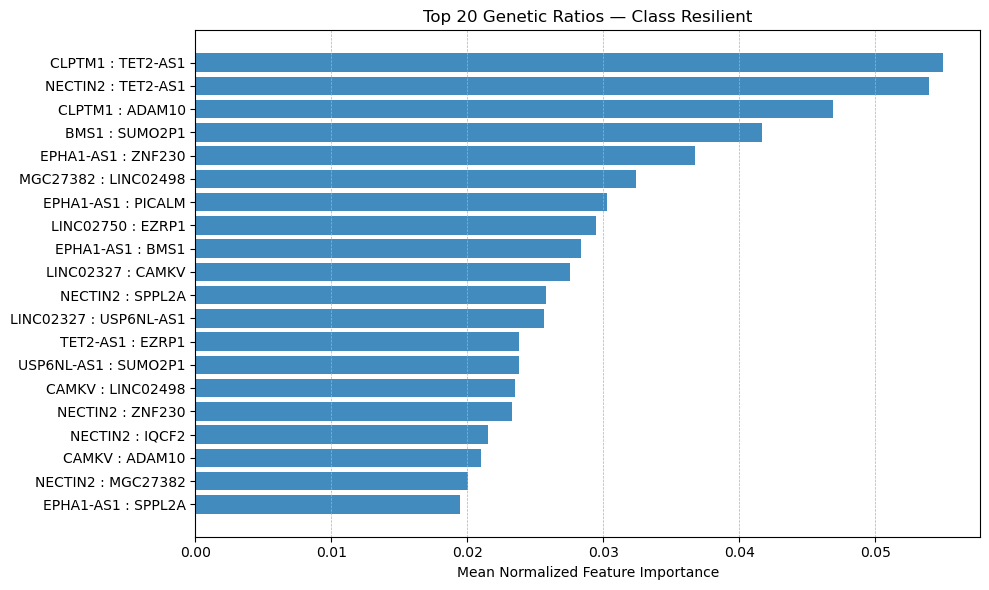

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/genetic_only_top20_ratios_Resilient.pdf


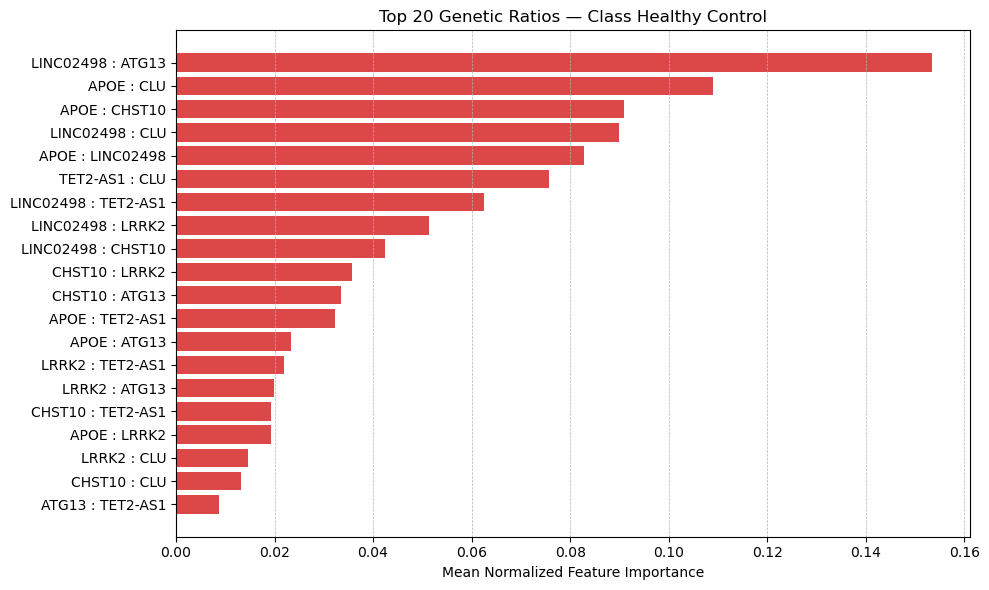

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/genetic_only_top20_ratios_Healthy_Control.pdf


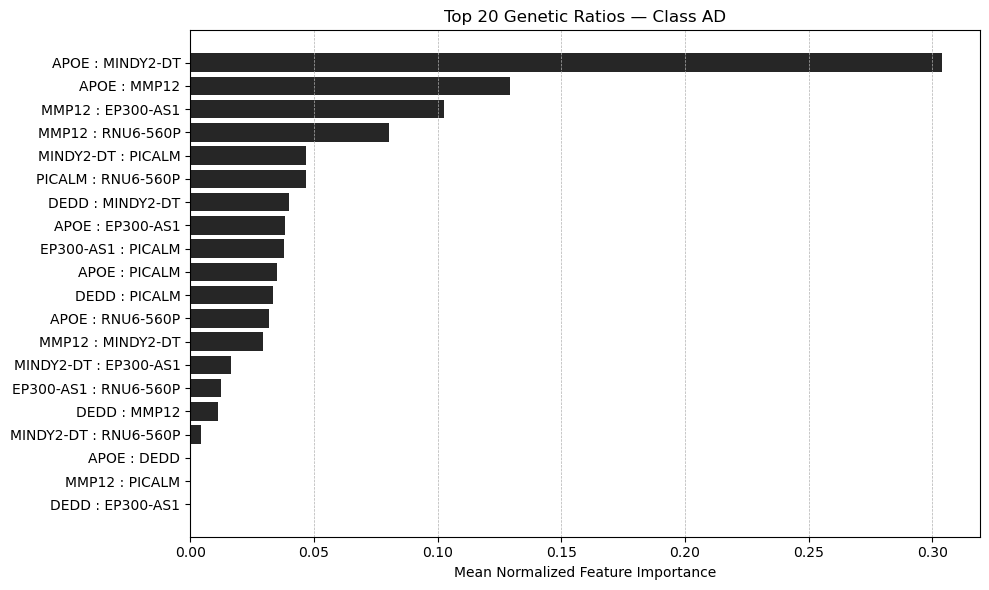

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/genetic_only_top20_ratios_AD.pdf


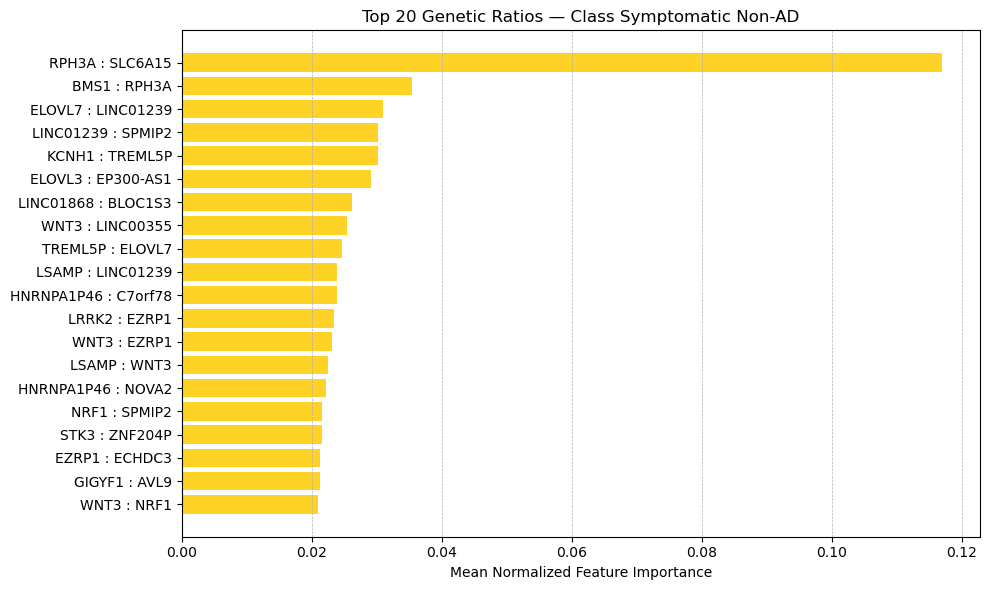

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/genetic_only_top20_ratios_Symptomatic_Non-AD.pdf


In [22]:
# =========================
# FEATURE IMPORTANCE PLOTS (GENE RATIOS) — STANDALONE
# =========================
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIG (edit as needed) ---
out_dir = "/Users/adithyamadduri/Desktop/Projects/Genomics_LGBM(Genomics+Meta)_RATIOS_fixed_rfe"
seeds   = [1, 2, 3, 4, 5]
top_n   = 20

# Load using these class names (match filenames)...
CLASSES_TO_LOAD = ["Resilient", "Healthy Control", "Typical AD", "Symptomatic Non-AD"]

# ...but display/label using these (rename "Typical AD" -> "AD").
DISPLAY_NAME = {
    "Resilient": "Resilient",
    "Healthy Control": "Healthy Control",
    "Typical AD": "AD",
    "Symptomatic Non-AD": "Symptomatic Non-AD",
}

CLASS_COLOR = {
    "Resilient": "#1f77b4",        # blue
    "Healthy Control": "#d62728",  # red
    "AD": "#000000",               # black
    "Symptomatic Non-AD": "#ffcc00" # yellow
}

def safe_cls(c: str) -> str:
    return c.replace("+", "plus").replace(" ", "_").replace("/", "-")

def get_feat_importances(automl):
    """
    Minimal helper in case of slight object differences.
    Keeps your current attribute paths first.
    """
    try:
        model = automl.model.estimator
    except AttributeError:
        model = getattr(automl, "model", automl)

    # Required attrs
    importances = getattr(model, "feature_importances_")
    features = getattr(automl, "feature_names_in_", None)
    if features is None:
        features = getattr(model, "feature_names_in_", None)
    if features is None:
        raise AttributeError("Could not find feature_names_in_ on automl/model.")
    return np.asarray(importances, dtype=float), np.asarray(features, dtype=str)

# === MAIN LOOP ===
os.makedirs(out_dir, exist_ok=True)

for cls_load in CLASSES_TO_LOAD:
    out_dir = "/Users/adithyamadduri/Desktop/Projects/Genomics_LGBM(Genomics+Meta)_RATIOS_fixed_rfe"
    feature_importance_list = []

    for seed in seeds:
        pkl_path = os.path.join(out_dir, f"seed{seed}_{safe_cls(cls_load)}_automl.pkl")
        if not os.path.exists(pkl_path):
            print(f"Missing: {pkl_path}")
            continue

        with open(pkl_path, "rb") as f:
            automl = pickle.load(f)

        importances, features = get_feat_importances(automl)

        # Normalize importances (sum to 1) and store as a Series
        s = importances.sum()
        if s == 0:
            # avoid div-by-zero; keep zeros
            norm_importance = importances
        else:
            norm_importance = importances / s
        feature_importance_list.append(pd.Series(norm_importance, index=features))

    if not feature_importance_list:
        print(f"No data for class: {cls_load}")
        continue

    # Combine across seeds and compute mean
    df_importances = pd.concat(feature_importance_list, axis=1)
    df_importances.columns = [f"seed{i+1}" for i in range(len(df_importances.columns))]
    df_importances["mean"] = df_importances.mean(axis=1)

    # Top N
    df_top = df_importances.sort_values("mean", ascending=False).head(top_n).copy()

    # Pretty names for ratio features
    df_top["mapped_name"] = df_top.index.str.replace("_div_", " : ", regex=False)

    # Plot
    display_name = DISPLAY_NAME[cls_load]          # e.g., "AD" instead of "Typical AD"
    color = CLASS_COLOR[display_name]

    plt.figure(figsize=(10, max(6, 0.3 * top_n)))
    # Reverse order for a descending barh
    plt.barh(y=df_top["mapped_name"][::-1], width=df_top["mean"][::-1],
             color=color, alpha=0.85)

    plt.xlabel("Mean Normalized Feature Importance")
    plt.title(f"Top {top_n} Genetic Ratios — Class {display_name}")
    plt.tight_layout()
    plt.grid(True, axis="x", linestyle="--", linewidth=0.5)

    out_dir = "/Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures"

    # Save with display name in filename
    plot_path = os.path.join(out_dir, f"genetic_only_top{top_n}_ratios_{safe_cls(display_name)}.pdf")
    plt.savefig(plot_path, dpi=300)
    plt.show()

    print(f"Saved: {plot_path}")

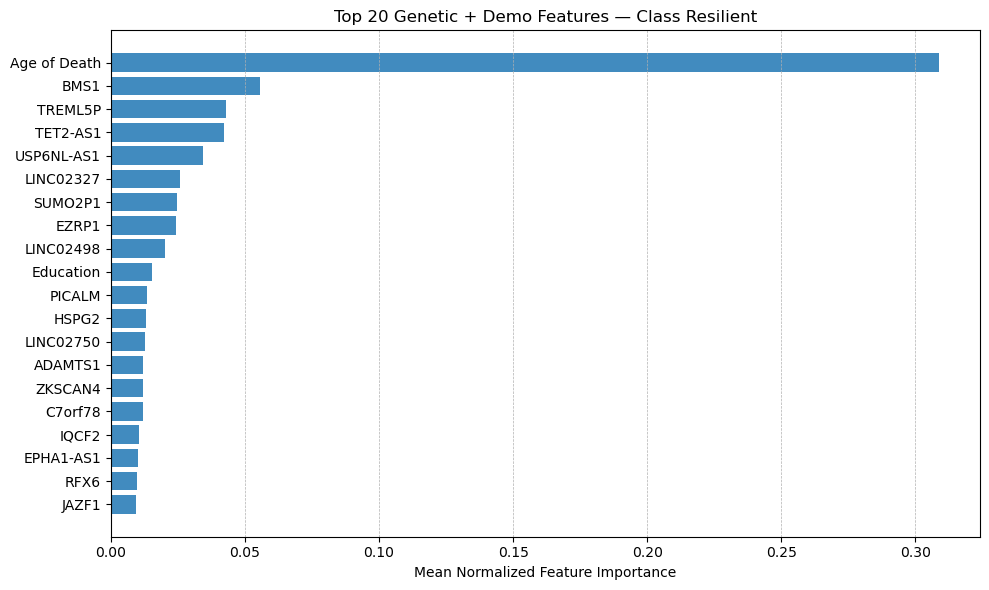

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/genetic_demo_top20_Resilient.pdf


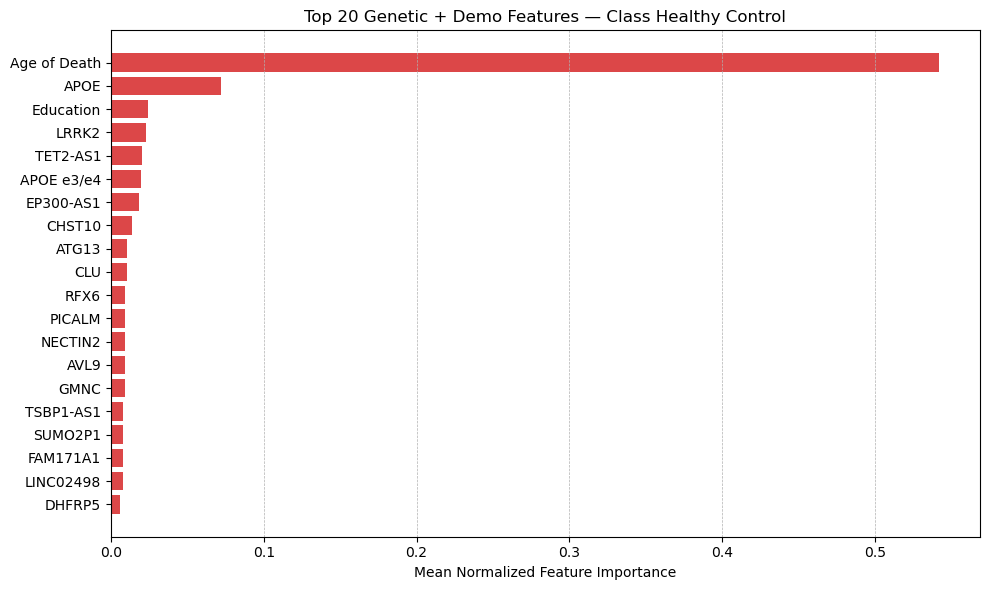

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/genetic_demo_top20_Healthy_Control.pdf


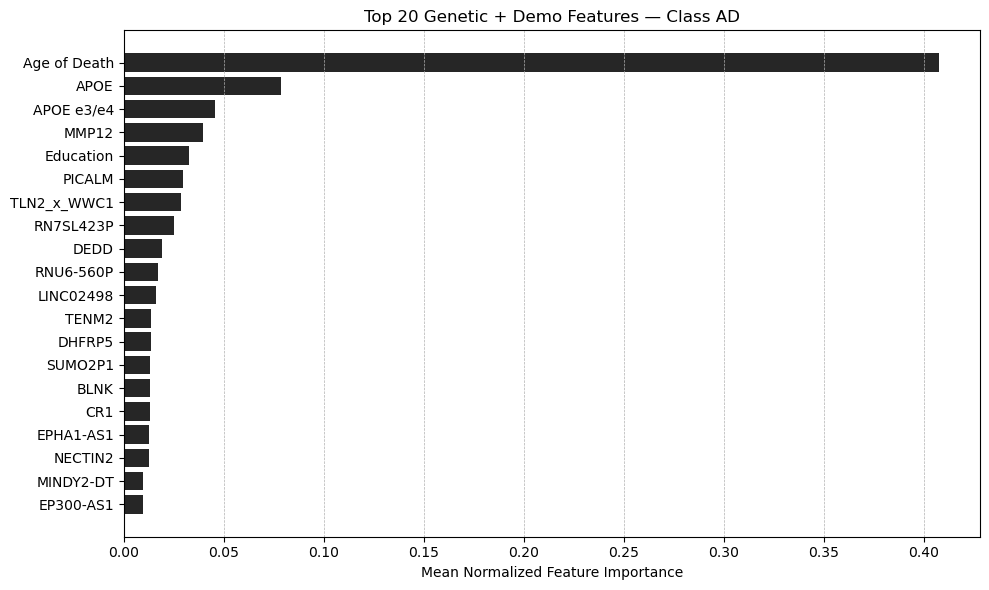

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/genetic_demo_top20_AD.pdf


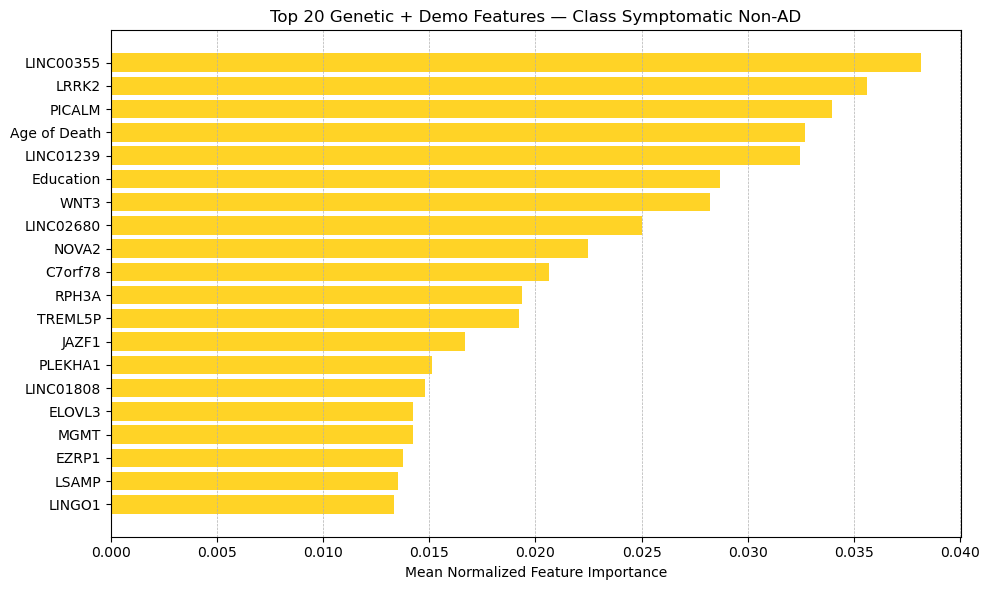

Saved: /Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures/genetic_demo_top20_Symptomatic_Non-AD.pdf


In [24]:
# =========================
# FEATURE IMPORTANCE PLOTS (GENE RATIOS) — STANDALONE
# =========================
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIG (edit as needed) ---
out_dir = "/Users/adithyamadduri/Desktop/Projects/ml4h_project/LGBM(Genes+Demo)"
seeds   = [1, 2, 3, 4, 5]
top_n   = 20

# Load using these class names (match filenames)...
CLASSES_TO_LOAD = ["Resilient", "Healthy Control", "Typical AD", "Symptomatic Non-AD"]

# ...but display/label using these (rename "Typical AD" -> "AD").
DISPLAY_NAME = {
    "Resilient": "Resilient",
    "Healthy Control": "Healthy Control",
    "Typical AD": "AD",
    "Symptomatic Non-AD": "Symptomatic Non-AD",
}

CLASS_COLOR = {
    "Resilient": "#1f77b4",        # blue
    "Healthy Control": "#d62728",  # red
    "AD": "#000000",               # black
    "Symptomatic Non-AD": "#ffcc00" # yellow
}

# ---- Feature renaming map ----
rename_map = {
    "age_death": "Age of Death",
    "educ": "Education",
    "APOE": "APOE",

    # APOE genotype mappings (adjust if your exact encodings differ)
    "apoe_genotype_22.0": "APOE e2/e2",
    "apoe_genotype_23.0": "APOE e2/e3",
    "apoe_genotype_24.0": "APOE e2/e4",
    "apoe_genotype_33.0": "APOE e3/e3",
    "apoe_genotype_34.0": "APOE e3/e4",
    "apoe_genotype_44.0": "APOE e4/e4",
}

def safe_cls(c: str) -> str:
    return c.replace("+", "plus").replace(" ", "_").replace("/", "-")

def get_feat_importances(automl):
    """
    Minimal helper in case of slight object differences.
    Keeps your current attribute paths first.
    """
    try:
        model = automl.model.estimator
    except AttributeError:
        model = getattr(automl, "model", automl)

    # Required attrs
    importances = getattr(model, "feature_importances_")
    features = getattr(automl, "feature_names_in_", None)
    if features is None:
        features = getattr(model, "feature_names_in_", None)
    if features is None:
        raise AttributeError("Could not find feature_names_in_ on automl/model.")
    return np.asarray(importances, dtype=float), np.asarray(features, dtype=str)

# === MAIN LOOP ===
os.makedirs(out_dir, exist_ok=True)

for cls_load in CLASSES_TO_LOAD:
    out_dir = "/Users/adithyamadduri/Desktop/Projects/ml4h_project/LGBM(Genes+Demo)"
    feature_importance_list = []

    for seed in seeds:
        pkl_path = os.path.join(out_dir, f"seed{seed}_{safe_cls(cls_load)}_automl.pkl")
        if not os.path.exists(pkl_path):
            print(f"Missing: {pkl_path}")
            continue

        with open(pkl_path, "rb") as f:
            automl = pickle.load(f)

        importances, features = get_feat_importances(automl)

        # Normalize importances (sum to 1) and store as a Series
        s = importances.sum()
        if s == 0:
            norm_importance = importances
        else:
            norm_importance = importances / s
        feature_importance_list.append(pd.Series(norm_importance, index=features))

    if not feature_importance_list:
        print(f"No data for class: {cls_load}")
        continue

    # Combine across seeds and compute mean
    df_importances = pd.concat(feature_importance_list, axis=1)
    df_importances.columns = [f"seed{i+1}" for i in range(len(df_importances.columns))]
    df_importances["mean"] = df_importances.mean(axis=1)

    # Top N
    df_top = df_importances.sort_values("mean", ascending=False).head(top_n).copy()

    # Pretty names for ratio features
    df_top["mapped_name"] = (
        df_top.index.str.replace("_div_", " : ", regex=False)
        .to_series()
        .replace(rename_map)  # apply rename_map
    )

    # Plot
    display_name = DISPLAY_NAME[cls_load]          # e.g., "AD" instead of "Typical AD"
    color = CLASS_COLOR[display_name]

    plt.figure(figsize=(10, max(6, 0.3 * top_n)))
    plt.barh(
        y=df_top["mapped_name"][::-1],
        width=df_top["mean"][::-1],
        color=color,
        alpha=0.85,
    )

    plt.xlabel("Mean Normalized Feature Importance")
    plt.title(f"Top {top_n} Genetic + Demo Features — Class {display_name}")
    plt.tight_layout()
    plt.grid(True, axis="x", linestyle="--", linewidth=0.5)

    out_dir = "/Users/adithyamadduri/Desktop/Projects/ml4h_project/Final_figures"

    # Save with display name in filename
    plot_path = os.path.join(out_dir, f"genetic_demo_top{top_n}_{safe_cls(display_name)}.pdf")
    plt.savefig(plot_path, dpi=300)
    plt.show()

    print(f"Saved: {plot_path}")